In [183]:
import tensorflow as tf
import keras
import numpy as np
import os
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import seaborn as sns

import scipy.stats as sc_stats

import random

from sklearn.model_selection import train_test_split


from mpl_toolkits.mplot3d import Axes3D


In [184]:
# parameters
time_steps = 1
inputs = 8
outputs = 2

In [169]:
dir_list = os.listdir("/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/")
dir_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"

subj_files_list =[]; ## list of subject_files fullfilling a criteria

dir_files = [i for i in os.listdir(dir_path) if i.startswith('sub')]

for subj_file_path in dir_files:

    file_path  ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"+ subj_file_path
    mypath =file_path
    
    play_names = [i for i in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,i)) and i.startswith('app')]   
    
    if len(play_names) >= 50: ## criteria
        subj_files_list.append(subj_file_path)
        


In [185]:
def metrics_manual(file_path):
    

    # subj_num=12

    onehot_encoder = OneHotEncoder(sparse=False)
    # file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/vcheck/subject_num_"+str(subj_num)
    
    if hist_flag==0:
        
        prob_train_df = pd.read_csv(file_path + "/prob_train_currO_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "/prob_test_currO_neurons="+str(neurons)+".csv")
        prob_val_df =  pd.read_csv(file_path + "/prob_val_currO_neurons="+str(neurons)+".csv")
    
    elif hist_flag==1:
        prob_train_df = pd.read_csv(file_path + "/prob_train_currOprevC_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "/prob_test_currOprevC_neurons="+str(neurons)+".csv")
        prob_val_df =  pd.read_csv(file_path + "/prob_val_currOprevC_neurons="+str(neurons)+".csv")
        
        
        
    elif hist_flag==2:
        prob_train_df = pd.read_csv(file_path + "/prob_train_currOprevR_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "/prob_test_currOprevR_neurons="+str(neurons)+".csv")
        prob_val_df =  pd.read_csv(file_path + "/prob_val_currOprevR_neurons="+str(neurons)+".csv")    
        
        
    elif hist_flag==3:
        prob_train_df = pd.read_csv(file_path + "/prob_train_currOprevRC_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "/prob_test_currOprevRC_neurons="+str(neurons)+".csv")
        prob_val_df =  pd.read_csv(file_path + "/prob_val_currOprevRC_neurons="+str(neurons)+".csv")
    
    elif hist_flag ==4:
        prob_train_df = pd.read_csv(file_path + "/prob_train_currentprevopts_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "/prob_test_currentprevopts_neurons="+str(neurons)+".csv")
        prob_val_df =  pd.read_csv(file_path + "/prob_val_currentprevopts_neurons="+str(neurons)+".csv")

    train_data_df = pd.read_csv(file_path+"/train_data.csv")
    test_data_df = pd.read_csv(file_path+"/test_data.csv")
    val_data_df = pd.read_csv(file_path+"/val_data.csv")


    prob_train =prob_train_df.values[:,1:]
    prob_test =prob_test_df.values[:,1:]
    prob_val =prob_val_df.values[:,1:]

    

    train_yy = train_data_df.Choice.values
    test_yy = test_data_df.Choice.values
    val_yy = val_data_df.Choice.values


    encode_categorical = train_yy.reshape(len(train_yy), 1)
    train_yy = onehot_encoder.fit_transform(encode_categorical)


    encode_categorical = test_yy.reshape(len(test_yy), 1)
    test_yy = onehot_encoder.fit_transform(encode_categorical)

    
    encode_categorical = val_yy.reshape(len(val_yy), 1)
    val_yy = onehot_encoder.fit_transform(encode_categorical)


    ############################################
    loss_train = -(np.dot(train_yy[:,0],np.log(prob_train[:,0])) + np.dot(train_yy[:,1],np.log(prob_train[:,1]) )) / train_yy.shape[0]
    acc_train = (np.dot(train_yy[:,0],prob_train[:,0]) + np.dot(train_yy[:,1],prob_train[:,1]))/train_yy.shape[0]
    pseudo_R2_train = 1 + loss_train/np.log(0.5)

    loss_test = -(np.dot(test_yy[:,0],np.log(prob_test[:,0])) + np.dot(test_yy[:,1],np.log(prob_test[:,1]) )) /test_yy.shape[0]
    acc_test = (np.dot(test_yy[:,0],prob_test[:,0]) + np.dot(test_yy[:,1],prob_test[:,1]))/test_yy.shape[0]
    pseudo_R2_test  = 1 + loss_test/np.log(0.5)
    
    
    loss_val = -(np.dot(val_yy[:,0],np.log(prob_val[:,0])) + np.dot(val_yy[:,1],np.log(prob_val[:,1]) )) / val_yy.shape[0]
    acc_val = (np.dot(val_yy[:,0],prob_val[:,0]) + np.dot(val_yy[:,1],prob_val[:,1]))/val_yy.shape[0]
    pseudo_R2_val = 1 + loss_val/np.log(0.5)

    ############################################

    # pseudoR2_test  = 1 + (-((np.dot(test_yy[:,0],np.log(prob_test[:,0])) + np.dot(test_yy[:,1],np.log(prob_test[:,1]))))/150)/np.log(0.5)

    # print(acc_test)
    # print(pseudoR2_test)
    
    metric_manual_df= pd.DataFrame(np.array([subj_num,acc_train,loss_train,pseudo_R2_train, acc_val,loss_val,pseudo_R2_val,acc_test,loss_test,pseudo_R2_test,neurons]).reshape(-1,11),columns =["Subject_number","accuracy_train","loss_train","pseudoR2_train", "accuracy_val","loss_val","pseudoR2_val","accuracy_test","loss_test","pseudo_R2_test","neurons"])

    metric_manual_df.to_csv(file_path+"/metric_manual.csv")
    
    return metric_manual_df

In [186]:
neurons=8
hist_flag=2
# for num, subj_file_path in enumerate(dir_list):
for num, subj_file_path in enumerate(subj_files_list):
    
    file_path  ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"+ subj_file_path
    print(num)
    file_path = file_path + "/OddEvenPlays/RandomizedPlays1"

    
    subj_num = subj_file_path
    metrics_manual_df = metrics_manual(file_path)    
    


0
1
2
3


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

4
5
6
7
8
9
10


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

11
12
13
14
15
16
17
18


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

19
20
21
22
23
24
25


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

26
27
28
29
30
31
32


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

33
34
35
36


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [187]:
all_subj_metrics_df = pd.DataFrame(); all_subj_metrics_manual_df = pd.DataFrame()
neurons=8
dir_list = os.listdir("/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/")
dir_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"

dir_files = [i for i in os.listdir(dir_path) if i.startswith('sub')]


# for num, subj_file_path in enumerate(dir_files):
for num, subj_file_path in enumerate(subj_files_list):
    
    
    file_path  ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"+ subj_file_path
    print(num)

    file_path = file_path + "/OddEvenPlays/RandomizedPlays1"

    
    subj_num = subj_file_path

    if hist_flag==0:
        
        file_name = file_path+"/LSTM_updated_Crossval_currO_metricsneurons="+str(neurons)+".csv"
        
    elif hist_flag==1:
         file_name = file_path+"/LSTM_updated_Crossval_currOprevC_metricsneurons="+str(neurons)+".csv"
            
    elif hist_flag==2:
         file_name = file_path+"/LSTM_updated_Crossval_currOprevR_metricsneurons="+str(neurons)+".csv"
            
            
    elif hist_flag==3:
         file_name = file_path+"/LSTM_updated_Crossval_currOprevRC_metricsneurons="+str(neurons)+".csv"


    
    elif hist_flag==4:
        file_name = file_path + "/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"
    
    
    
    
    
    all_subj_metrics_manual_df = all_subj_metrics_manual_df.append(pd.read_csv(file_path+"/metric_manual.csv"))
    
    
    
    
    
    
#     metric_out_df.to_csv(file_path+"LSTM_updated_CrossvalTESTinsess2ndhalf_currprev_opts_metrics_neurons="+str(neurons)+".csv")

    all_subj_metrics_df = all_subj_metrics_df.append(pd.read_csv(file_name))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [188]:
all_subj_metrics_df["pseudoR2"] = 1+all_subj_metrics_df.loss/(np.log(0.5))

all_subj_metrics_df["pseudoR2_test"] = 1+all_subj_metrics_df.loss_test/(np.log(0.5))
                                                                        
all_subj_metrics_df["pseudoR2_valid"] = 1 + all_subj_metrics_df.loss_val/(np.log(0.5))

In [189]:
all_subj_metrics_df8=all_subj_metrics_df
all_subj_metrics_manual_df8 = all_subj_metrics_manual_df

In [152]:
os.mkdir(dir_path+"Summaries/OddEvenPlays/RandomizedPlays10/")

In [190]:
# all_subj_metrics_df8.to_csv(dir_path+"Summaries/curr_prev_opts_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts
# all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/curr_prev_opts_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts

if hist_flag ==0 :
    all_subj_metrics_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currO_all_subj_metrics_df8_testsess.csv") ## current options
    all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currO_all_subj_metrics_manual_df8_testsess.csv") ## current options


elif hist_flag ==1 :
    all_subj_metrics_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevC_all_subj_metrics_df8_testsess.csv") ## current options, prev actions
    all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevC_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions,

elif hist_flag ==2:
    all_subj_metrics_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevR_all_subj_metrics_df8_testsess.csv") ## current options, prev reward
    all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevR_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev reward
    
    
    
elif hist_flag ==3 :
    all_subj_metrics_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevRC_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcomes
    all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevRC_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev outcomes


elif hist_flag==4 :
    all_subj_metrics_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/curr_prev_opts_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts
    all_subj_metrics_manual_df8.to_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/curr_prev_opts_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts



## PROSPECT THEORY

In [172]:
PT_file_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/appdata/"
# PT_file_name = PT_file_path + "PT_loss_updated_combined_1sthalf.csv"
# PT_file_name = PT_file_path + "/Summaries/PT_loss_updated_50_split_combined_1sthalf.csv"
# PT_file_name = PT_file_path + "/Summaries/OddEvenPlays/PT_loss_updated_50_split_combined_1sthalf.csv"
PT_file_name = PT_file_path + "/Summaries/OddEvenPlays/RandomizedPlays1/PT_loss_updated_50_split_combined_1sthalf.csv"


PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics

,Subject_number,PT_loss,PT_pseudoR2,PT_accuracy,PT_loss_test,PT_pseudoR2_test,PT_accuracy_test
1,2,612.152594,0.273128,0.669324,181.932092,0.252215,0.666859
37,38,793.261902,0.273375,0.661461,209.724655,0.335014,0.681360
64,65,3294.086353,0.240230,0.641940,973.025320,0.223144,0.637690
80,81,493.633262,0.391314,0.718342,144.563115,0.382957,0.707207
89,90,677.391417,0.291320,0.678173,193.904240,0.282706,0.665596
118,119,672.557451,0.159190,0.599714,197.368695,0.123868,0.595319
131,132,832.478641,0.079684,0.552597,243.470594,0.068292,0.548014
133,134,838.343204,0.093348,0.560292,245.144081,0.061888,0.550024
157,158,604.581175,0.353906,0.702581,178.903317,0.338198,0.689117
171,172,635.566436,0.400700,0.732190,201.648763,0.341815,0.712406


## MODEL COMPARISON

In [191]:
all_subj_metrics_manual_currO=pd.read_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currO_all_subj_metrics_manual_df8_testsess.csv") ## current options
all_subj_metrics_manual_currOprevC=pd.read_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevC_all_subj_metrics_manual_df8_testsess.csv") ## current options + prev actionn

all_subj_metrics_manual_currOprevR=pd.read_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevR_all_subj_metrics_manual_df8_testsess.csv") ## current options + prev rewards

all_subj_metrics_manual_currOprevRC=pd.read_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/currOprevRC_all_subj_metrics_manual_df8_testsess.csv") ## current options + prev action+ prev outcomes

all_subj_metrics_manual_currprevopts=pd.read_csv(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1/curr_prev_opts_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts


## PROSPECT THEORY vs RNN

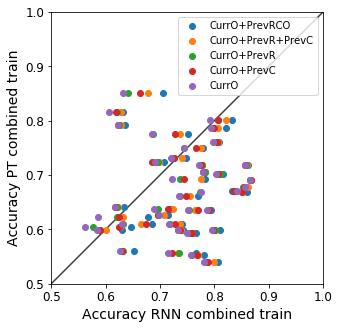

In [192]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined train',Fontsize=14);
ax.set_ylabel('Accuracy PT combined train'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);


# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Post pre-train Acc(train)", color="red")

# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Tensorflow", color="green")

# plt.scatter(all_subj_metrics_df8.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].accuracy_test,PT_metrics.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")

# plt.scatter(all_subj_metrics_manual_df8.accuracy_train,PT_metrics.PT_accuracy,label ="Manual", color="blue")


# plt.scatter(all_subj_metrics_manual_df8.loc[all_subj_metrics_manual_df8.accuracy_train.values>PT_metrics.PT_accuracy_train.values+0.05].accuracy_train,PT_metrics.loc[all_subj_metrics_manual_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")


plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_train, PT_metrics.PT_accuracy,label="CurrO+PrevRCO")
plt.scatter(all_subj_metrics_manual_currOprevRC.accuracy_train, PT_metrics.PT_accuracy,label="CurrO+PrevR+PrevC")
plt.scatter(all_subj_metrics_manual_currOprevR.accuracy_train, PT_metrics.PT_accuracy,label="CurrO+PrevR")

plt.scatter(all_subj_metrics_manual_currOprevC.accuracy_train, PT_metrics.PT_accuracy,label="CurrO+PrevC")
plt.scatter(all_subj_metrics_manual_currO.accuracy_train, PT_metrics.PT_accuracy, label="CurrO")




plt.legend(loc=0);
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1" +"/Accuracy_train_RNN_PT.pdf")

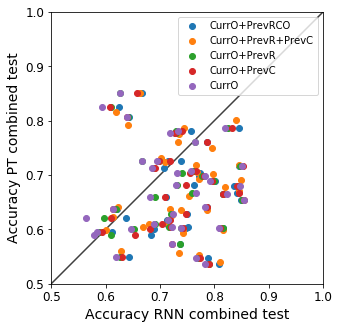

In [193]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined test',Fontsize=14);
ax.set_ylabel('Accuracy PT combined test'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);


# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Post pre-train Acc(train)", color="red")

# plt.scatter(all_subj_metrics_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="Tensorflow", color="green")

# plt.scatter(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="manual", color="blue")


# plt.scatter(all_subj_metrics_df8.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].accuracy_test,PT_metrics.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")

# plt.scatter(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="Manual", color="blue")


# plt.scatter(all_subj_metrics_manual_df8.loc[all_subj_metrics_manual_df8.accuracy_train.values>PT_metrics.PT_accuracy_train.values+0.05].accuracy_train,PT_metrics.loc[all_subj_metrics_manual_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")

plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_test, PT_metrics.PT_accuracy_test, label="CurrO+PrevRCO")

plt.scatter(all_subj_metrics_manual_currOprevRC.accuracy_test, PT_metrics.PT_accuracy,label="CurrO+PrevR+PrevC")
plt.scatter(all_subj_metrics_manual_currOprevR.accuracy_test, PT_metrics.PT_accuracy_test,label="CurrO+PrevR")

plt.scatter(all_subj_metrics_manual_currOprevC.accuracy_test, PT_metrics.PT_accuracy_test,label="CurrO+PrevC")

plt.scatter(all_subj_metrics_manual_currO.accuracy_test, PT_metrics.PT_accuracy_test,label="CurrO")




plt.legend(loc=0);
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1" +"/Accuracy_test_RNN_PT.pdf")

In [180]:
sc_stats.wilcoxon(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test)

WilcoxonResult(statistic=130.0, pvalue=0.0008329331798722847)

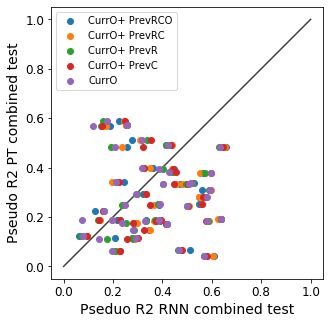

In [194]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseduo R2 RNN combined test',Fontsize=14);
ax.set_ylabel('Pseudo R2 PT combined test'  ,Fontsize=14);

# ax.set_xlim([0.5,1])
# ax.set_ylim([0.5,1]);



# plt.scatter(all_subj_metrics_df8.pseudoR2_test,PT_metrics.PT_pseudoR2_test,label ="Tensorflow", color="green")

# plt.scatter(all_subj_metrics_manual_df8.pseudo_R2_test,PT_metrics.PT_pseudoR2_test,label ="manual", color="blue")


plt.scatter(all_subj_metrics_manual_currprevopts.pseudo_R2_test, PT_metrics.PT_pseudoR2_test, label="CurrO+ PrevRCO")
plt.scatter(all_subj_metrics_manual_currOprevRC.pseudo_R2_test, PT_metrics.PT_pseudoR2_test, label="CurrO+ PrevRC")

plt.scatter(all_subj_metrics_manual_currOprevR.pseudo_R2_test, PT_metrics.PT_pseudoR2_test, label="CurrO+ PrevR")

plt.scatter(all_subj_metrics_manual_currOprevC.pseudo_R2_test, PT_metrics.PT_pseudoR2_test, label="CurrO+ PrevC")
plt.scatter(all_subj_metrics_manual_currO.pseudo_R2_test, PT_metrics.PT_pseudoR2_test,label="CurrO")


plt.legend(loc=0);
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1" +"/PseudoR2_RNN_PT.pdf")

In [134]:
sc_stats.wilcoxon(all_subj_metrics_manual_df8.pseudo_R2_test,PT_metrics.PT_pseudoR2_test)

WilcoxonResult(statistic=186.0, pvalue=0.012532658105357678)

## RNN vs RNN

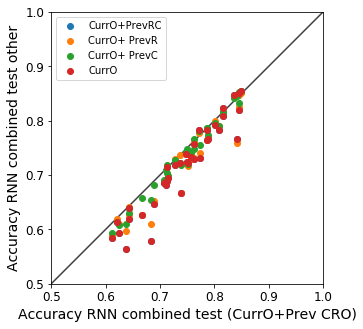

In [195]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined test (CurrO+Prev CRO)',Fontsize=14);
ax.set_ylabel('Accuracy RNN combined test other'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);

plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currO.accuracy_test, label="CurrO+PrevRC")
plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currOprevR.accuracy_test, label = "CurrO+ PrevR")

plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currOprevC.accuracy_test, label = "CurrO+ PrevC")
plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currO.accuracy_test, label="CurrO")





plt.legend(loc=0);
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1" +"/Accuracy_test_RNN_RNN.pdf")

In [136]:
sc_stats.wilcoxon(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currO.accuracy_test)

WilcoxonResult(statistic=45.0, pvalue=3.765068763007386e-06)

In [137]:
sc_stats.wilcoxon(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currOprevC.accuracy_test)

WilcoxonResult(statistic=89.0, pvalue=7.49026985344527e-05)

In [138]:
sc_stats.wilcoxon(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_currOprevRC.accuracy_test)

WilcoxonResult(statistic=194.0, pvalue=0.017497194374994803)

No handles with labels found to put in legend.


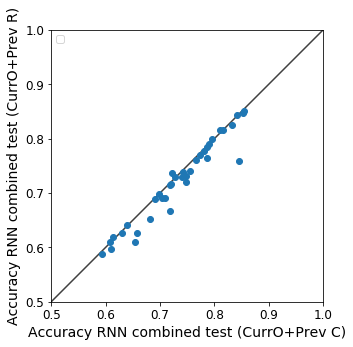

In [200]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined test (CurrO+Prev C)',Fontsize=14);
ax.set_ylabel('Accuracy RNN combined test (CurrO+Prev R)'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);

plt.scatter(all_subj_metrics_manual_currOprevC.accuracy_test, all_subj_metrics_manual_currOprevR.accuracy_test)





plt.legend(loc=0);
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1" +"/Accuracy_test_PrevRvsPrevC.pdf")

## Model Comparison

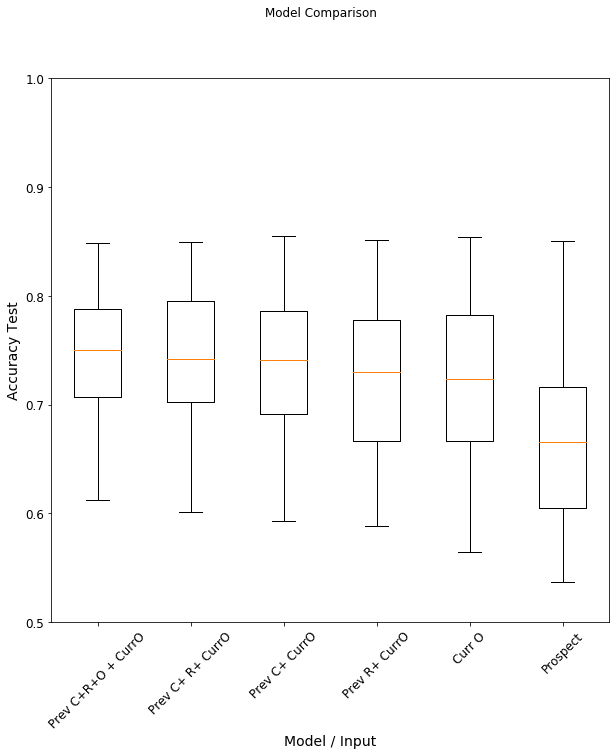

In [202]:


train_Acc_all_models_df = {'currprevopts':all_subj_metrics_manual_currprevopts.accuracy_test,  'currOprevRC':all_subj_metrics_manual_currOprevRC.accuracy_test,'currOprevC':all_subj_metrics_manual_currOprevC.accuracy_test, 'currOprevR':all_subj_metrics_manual_currOprevR.accuracy_test,'currO':all_subj_metrics_manual_currO.accuracy_test, 'PT':PT_metrics.PT_accuracy_test.to_list()}
train_Acc_all_models_df = pd.DataFrame(train_Acc_all_models_df)
plt.figure(figsize=(10,10))
# plt.boxplot(np.array([train_R2_all_models_df.PrevCRORT,train_R2_all_models_df.PrevCRO,train_R2_all_models_df.PrevCR,train_R2_all_models_df.Curr,train_R2_all_models_df.PT]).T,labels=["PrevC+R+O+RT+ CurrO","PrevC+R+O+ CurrO","PrevC+R +CurrO","CurrO","Prospect"]);
plt.boxplot(np.array([train_Acc_all_models_df.currprevopts,train_Acc_all_models_df.currOprevRC,train_Acc_all_models_df.currOprevC,train_Acc_all_models_df.currOprevR, train_Acc_all_models_df.currO,train_Acc_all_models_df.PT]).T, labels=["Prev C+R+O + CurrO","Prev C+ R+ CurrO","Prev C+ CurrO","Prev R+ CurrO","Curr O","Prospect"] );

plt.xlabel("Model / Input");
plt.ylabel('Accuracy Test');
plt.suptitle("Model Comparison");
plt.xticks(rotation=45)
plt.ylim([0.5,1]);

# # plt.savefig(LSTM_file_path+"/ModelComparison_train.pdf")
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays1" +"/ModelComparison.pdf")

## 5 shuffles vs 1 shuffle

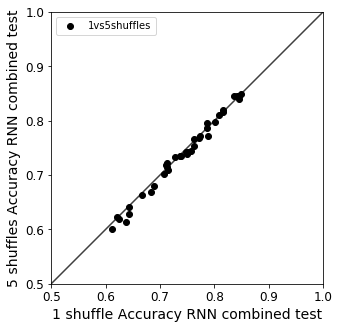

In [166]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('1 shuffle Accuracy RNN combined test',Fontsize=14);
ax.set_ylabel('5 shuffles Accuracy RNN combined test'  ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);

plt.scatter(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_df8.accuracy_test, label="1vs5shuffles",color="black")




plt.legend(loc=0);
plt.savefig(dir_path+"Summaries/OddEvenPlays/RandomizedPlays10" +"/Accuracy_test_RNN_RNN.pdf")

In [157]:
sc_stats.wilcoxon(all_subj_metrics_manual_currprevopts.accuracy_test, all_subj_metrics_manual_df8.accuracy_test)

WilcoxonResult(statistic=194.0, pvalue=0.017497194374994803)